In [1]:
import pandas as pd

# Загрузка данных
data = pd.read_csv('D:/Учеба/breast_cancer.csv')

In [2]:
# Просмотр первых нескольких строк
print(data.head())

# Общая информация о данных
print(data.info())

# Описательная статистика
print(data.describe())

   Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape   
0                5                        1                         1  \
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei   
0                  1                            2            1  \
1                  5                            7           10   
2                  1                            2            2   
3                  1                            3            4   
4                  3                            2            1   

   Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0                3                1        1      2  
1                3                2        1      2  
2 

In [3]:
print(data.isnull().sum())

# Обработка пропущенных значений (пример)
data = data.dropna()  # удалить строки с пропущенными значениями

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

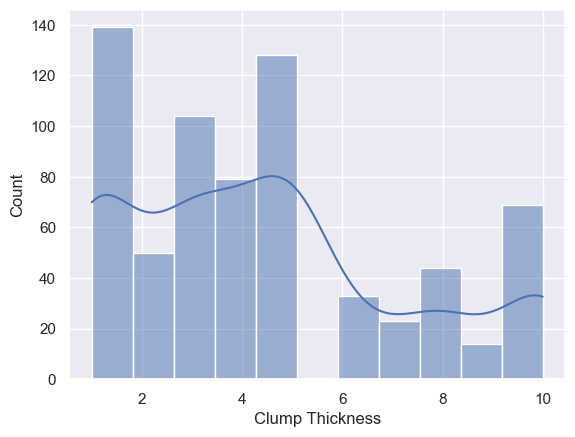

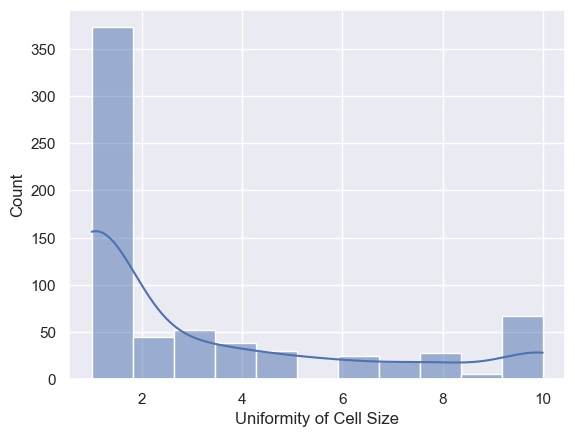

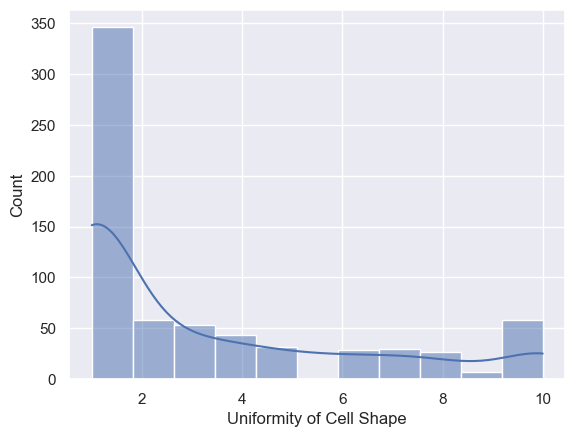

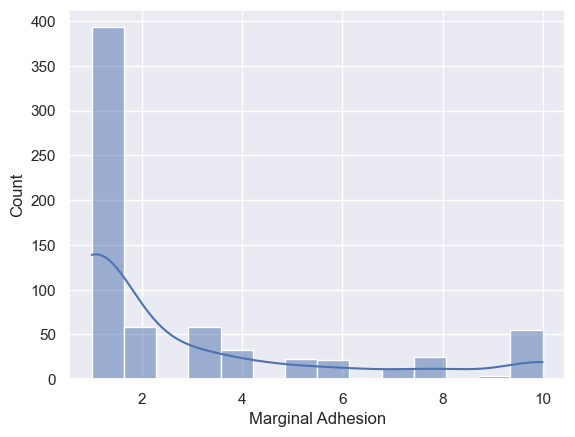

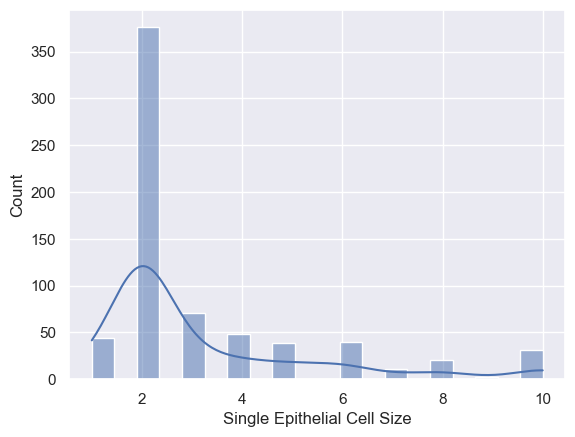

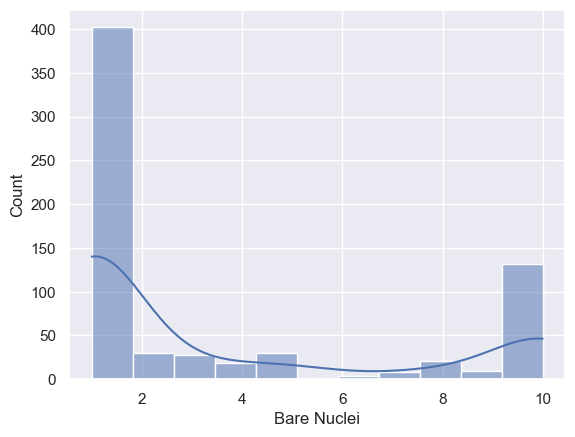

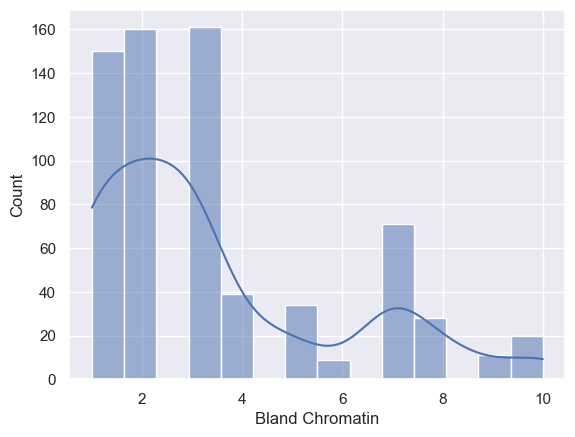

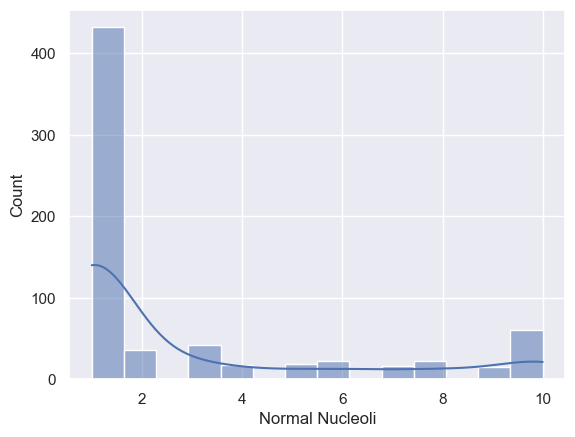

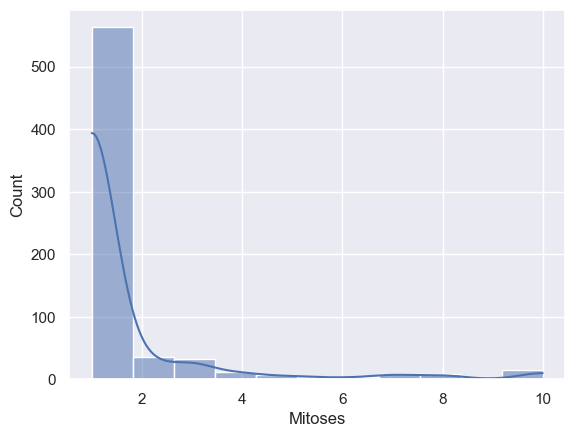

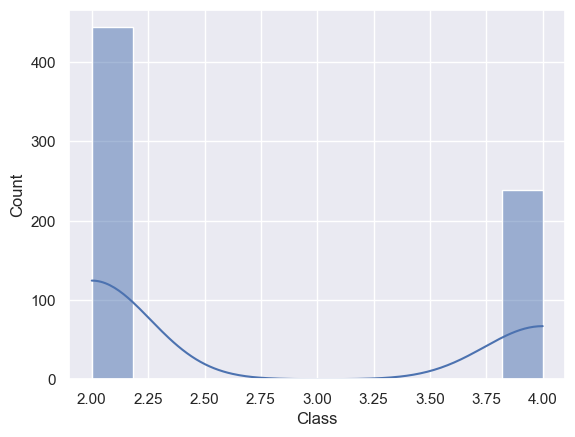

In [9]:
# Анализ числовых признаков
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns

for feature in numeric_features:
    sns.histplot(data[feature], kde=True)
    plt.show()


In [10]:
# Анализ категориальных признаков
categorical_features = data.select_dtypes(include=['object']).columns

for feature in categorical_features:
    sns.countplot(x=feature, data=data)
    plt.show()


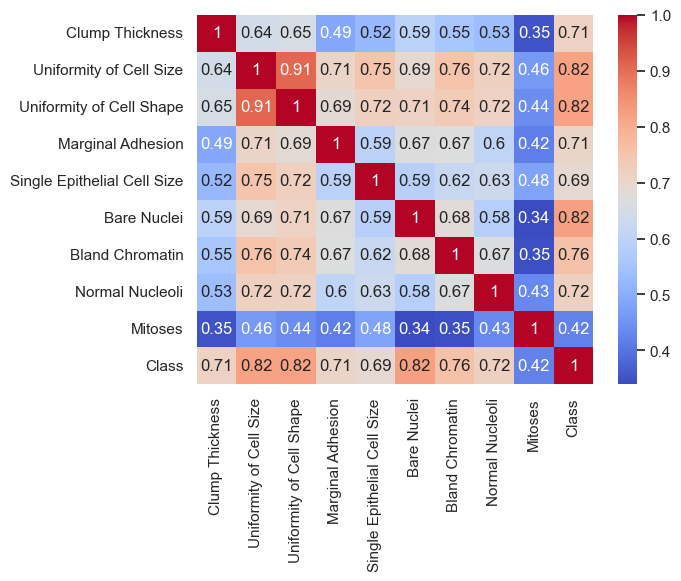

In [11]:
# Матрица корреляций
correlation_matrix = data[numeric_features].corr()

# Тепловая карта корреляций
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


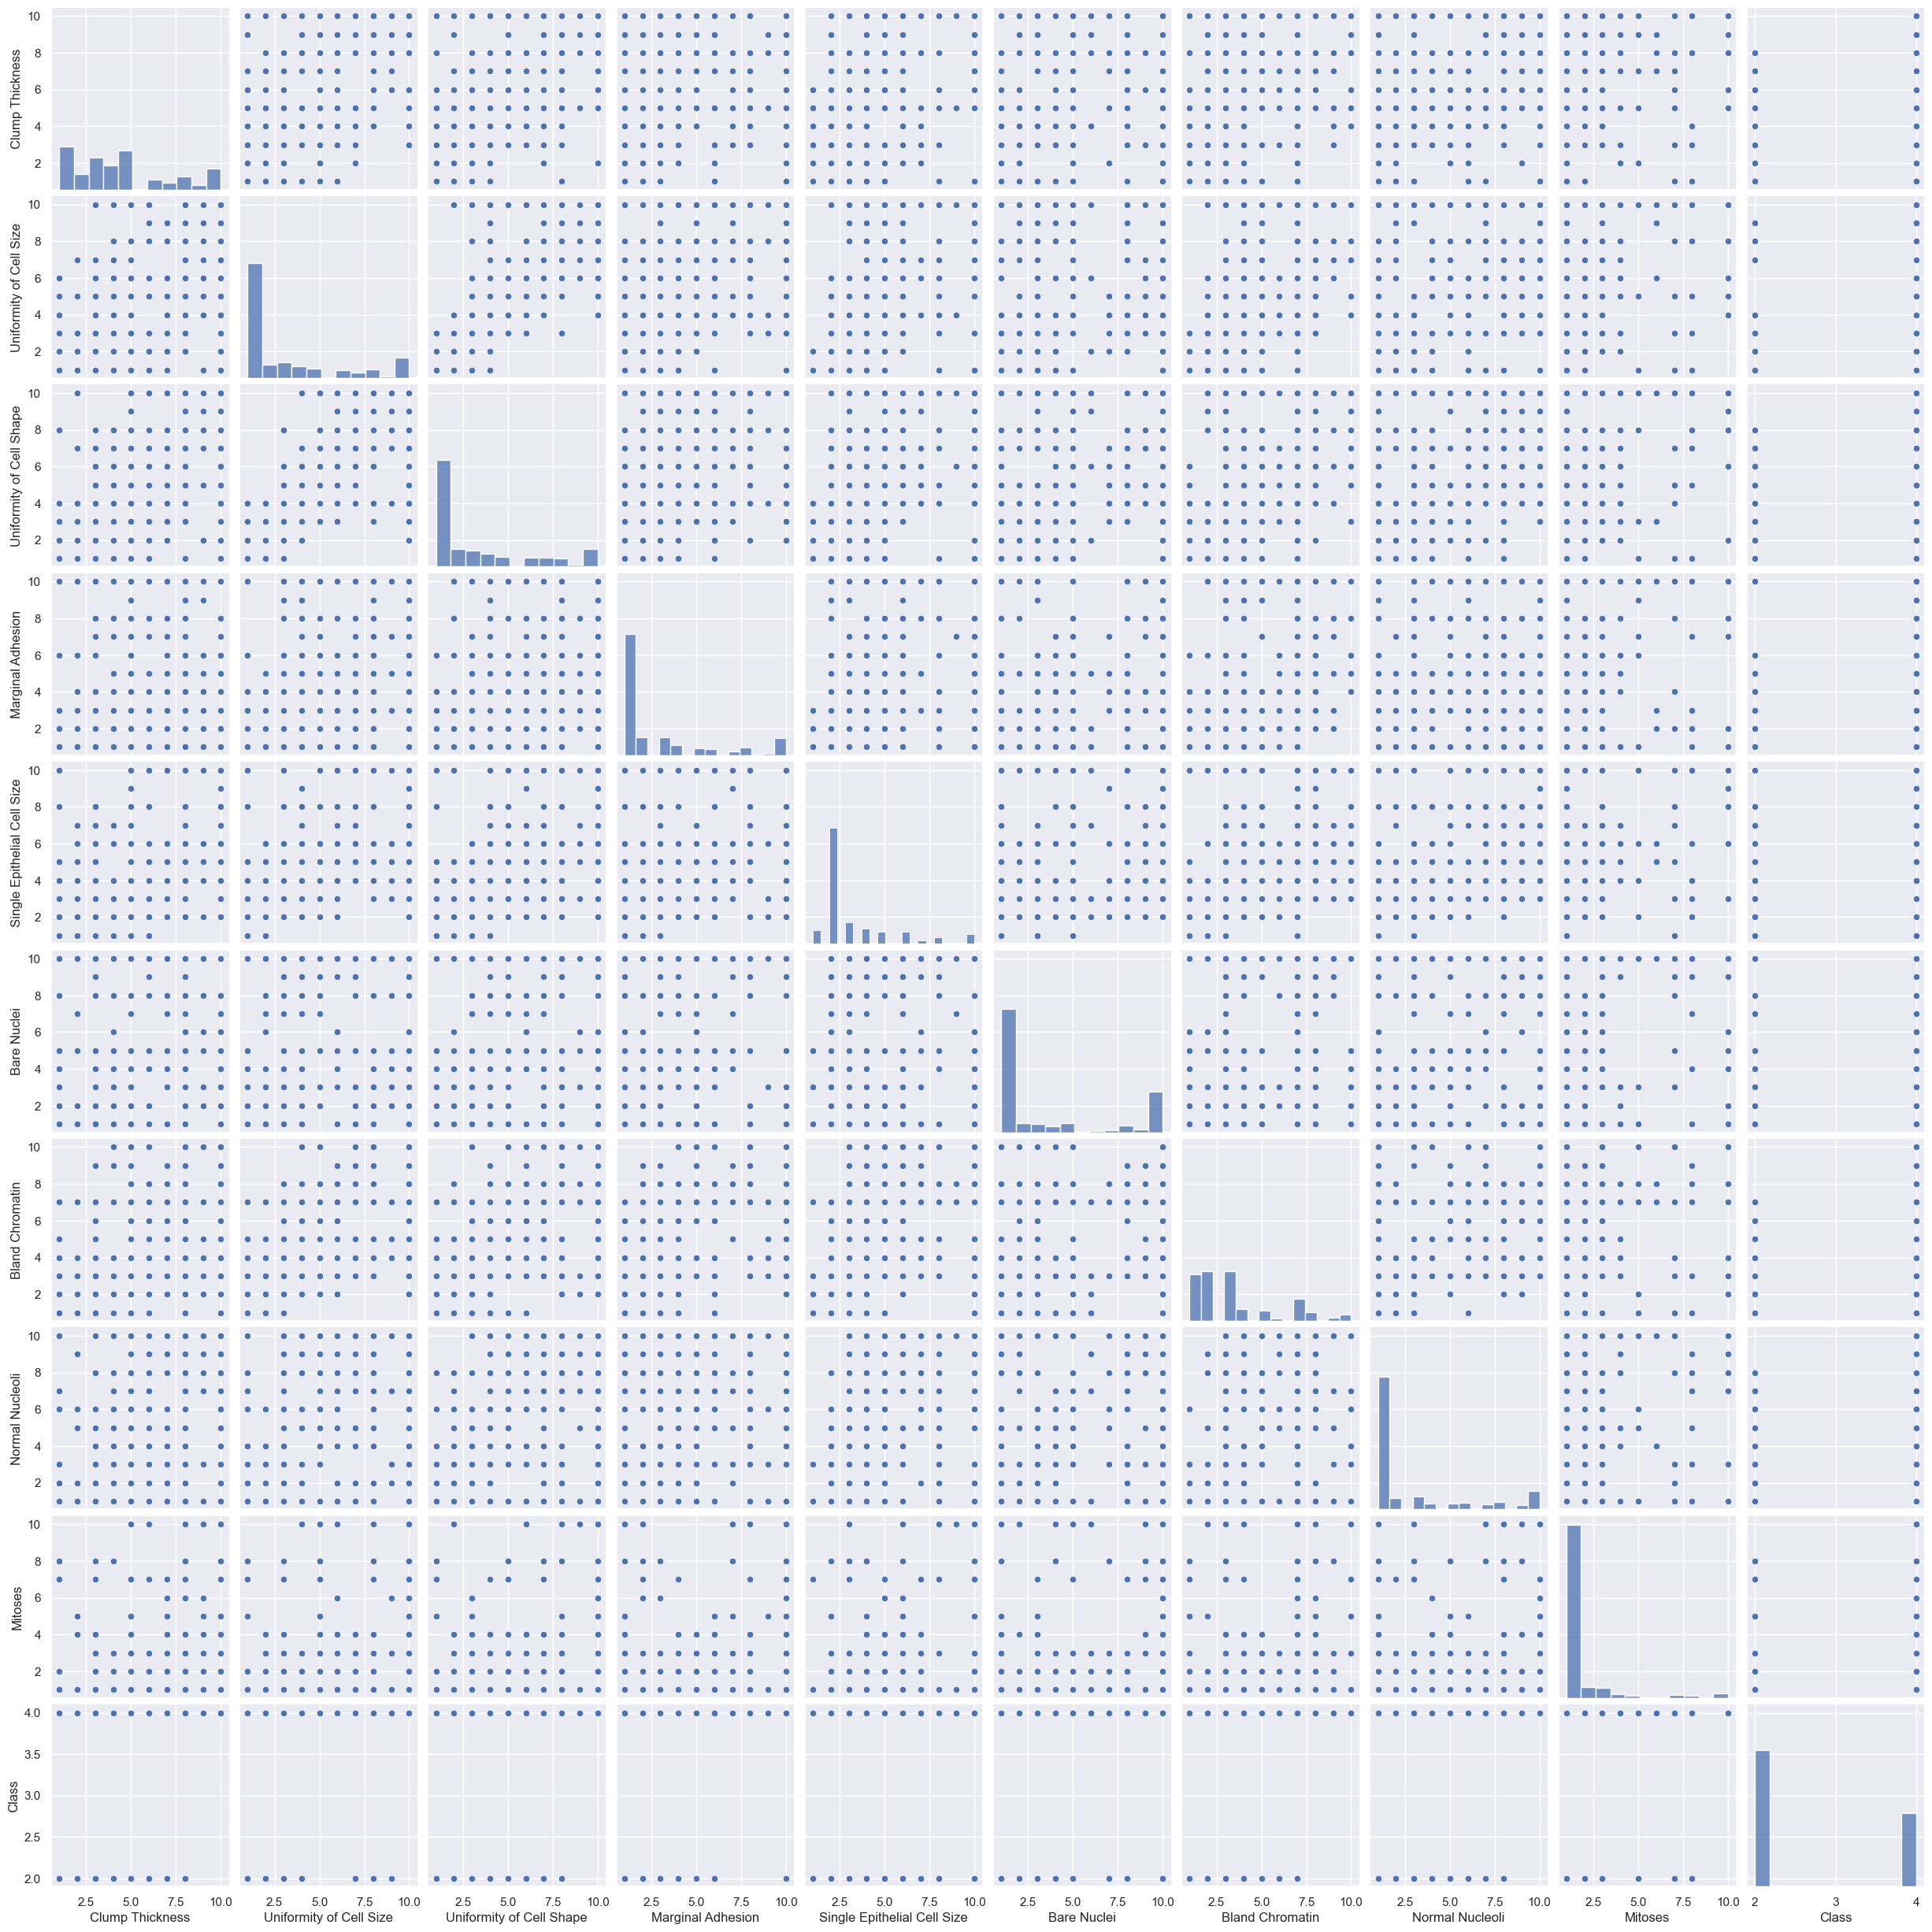

In [12]:
# Парные диаграммы рассеяния
sns.pairplot(data[numeric_features])
plt.show()


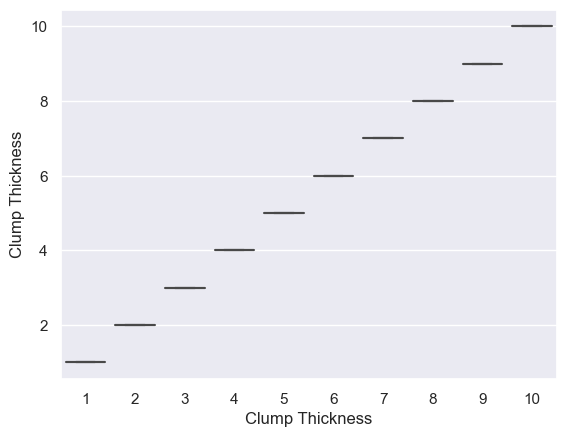

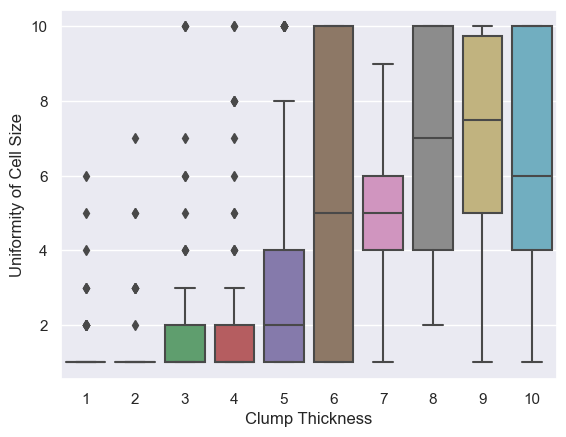

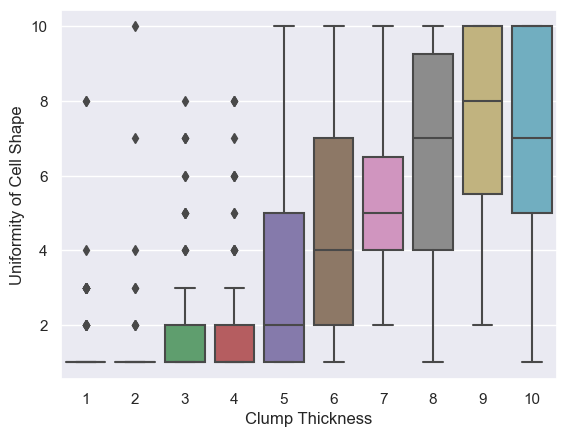

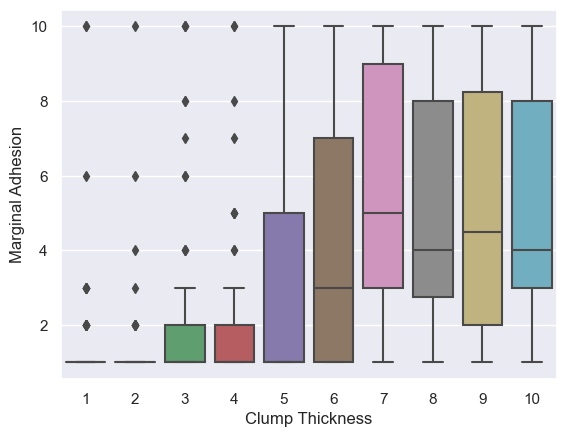

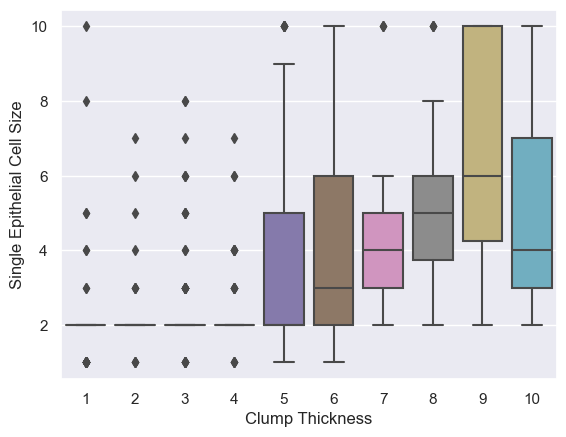

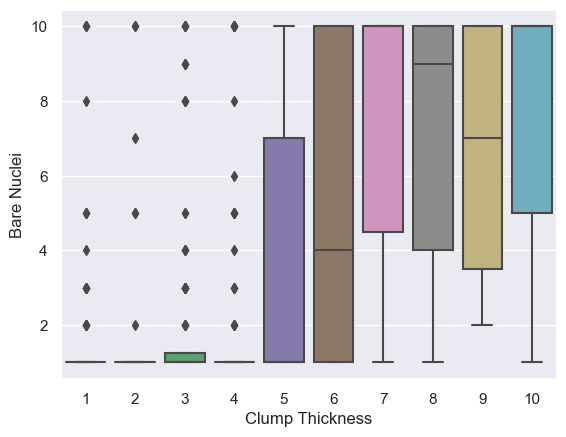

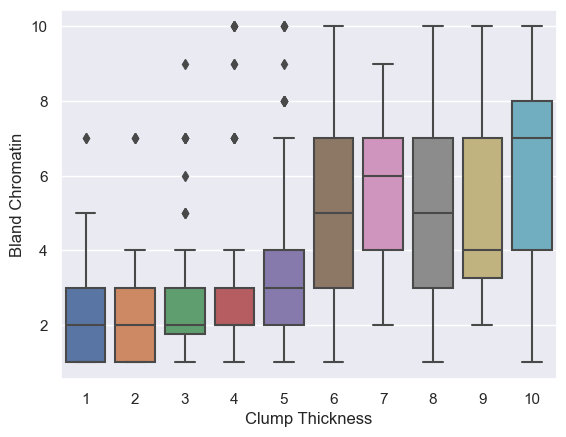

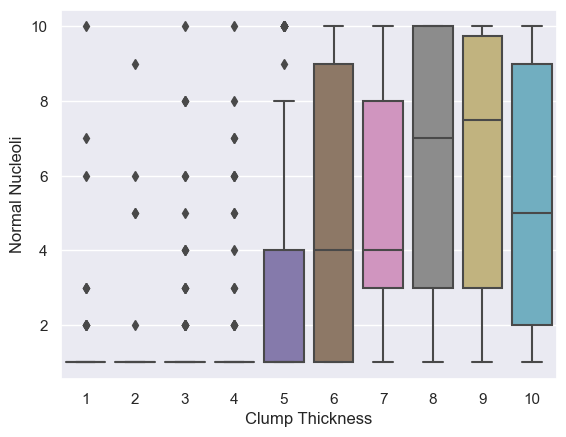

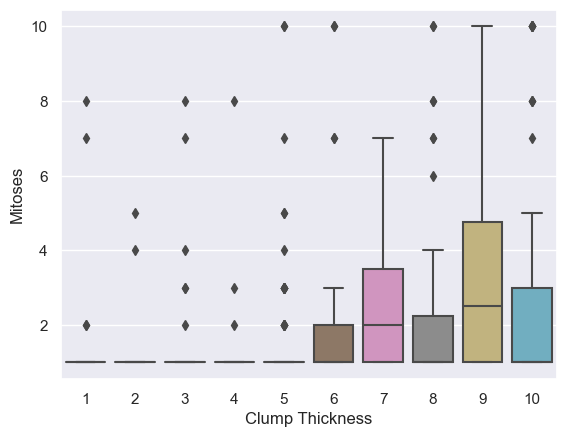

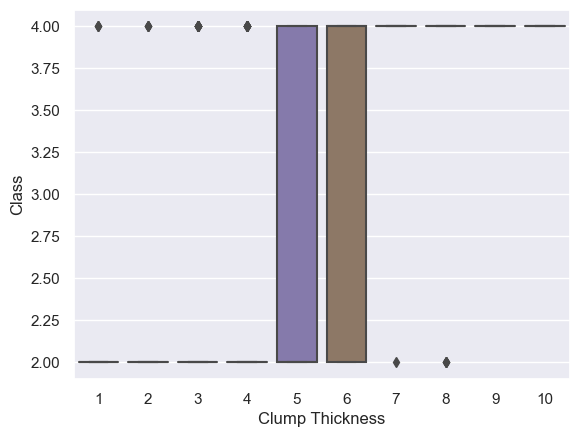

In [14]:


# Боксплоты для числовых переменных
for feature in numeric_features:
    sns.boxplot(x='Clump Thickness', y=feature, data=data)
    plt.show()


Mean Squared Error: 1.9348325204104588e-29
R-squared: 1.0


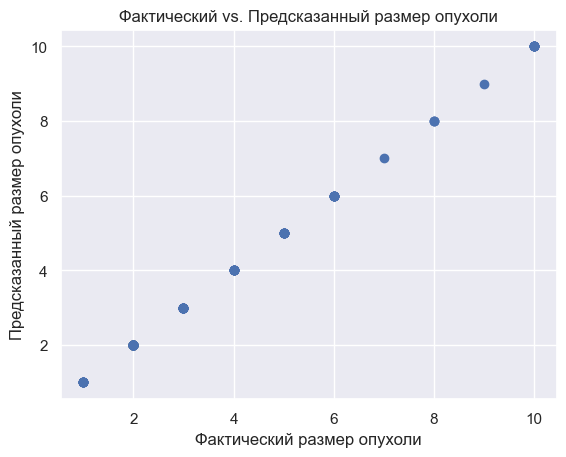

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Выбор признаков и целевой переменной
X = data
y = data['Single Epithelial Cell Size']  # Например, размер опухоли (mean radius)

# Разделение на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

# Оценка производительности модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Визуализация фактических и предсказанных значений
plt.scatter(y_test, y_pred)
plt.xlabel("Фактический размер опухоли")
plt.ylabel("Предсказанный размер опухоли")
plt.title("Фактический vs. Предсказанный размер опухоли")
plt.show()
